In [47]:
import pandas as pd
file_path = 'C:/Users/loydt/Documents/datasets/raw/Electronic_sales_Sep2023-Sep2024.csv'
df = pd.read_csv(file_path)

# **Sales Performance & Revenue Analysis Questions:**

In [250]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


**Overall Sales Trends:**

*   Are sales increasing or decreasing over time?
*   Which product types generate the most revenue?
*   How do cancellations impact revenue?

**Cancellations:**

*   What percentage of total orders are canceled?
*   Are certain product types more likely to be canceled?
*   What are the common reasons for cancellations?

**Payment Methods:**

*   Which payment methods are most commonly used?
*   Are there any correlations between payment methods and order cancellations?

**Add-ons:**

*   How do add-ons contribute to revenue?
*   Do customers who purchase add-ons have higher overall spending?
*   Are there specific product types that drive more add-on purchases?


-------------------

## **Overall Sales Trends:**

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.month

# Filter only completed transactions
completed = df[df['Order Status'] == 'Completed']
df['Sales'] = df['Total Price']
sales = completed.groupby(['Product Type', 'Month'])['Sales'].sum().reset_index()


### **1. Are sales increasing or decreasing over time?**

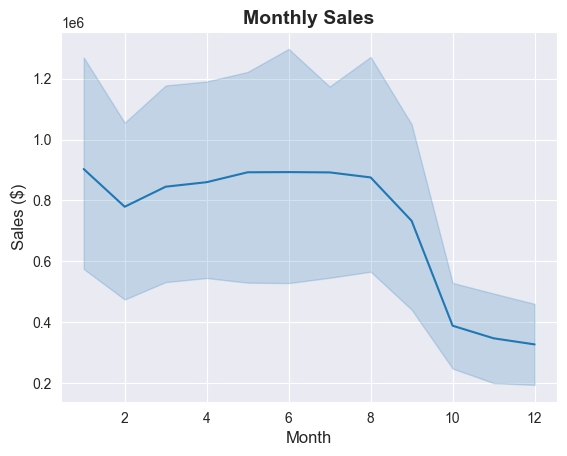

In [ ]:
sns.lineplot(data=sales, x='Month', y='Sales')
plt.xlabel("Month", fontsize=12)  
plt.ylabel("Sales ($)", fontsize=12)  
plt.title("Monthly Sales", fontsize=14, fontweight="bold")
plt.show()

**Overall Trend:**

*   The sales initially decreases slightly from month 1 to month 2.
*   From month 2 to month 6 the sales increased a little.
*   It is relatively stable between months 6 and 8.
*   The sales then experiences a significant decrease from months 8 through 10.
*   From month 10 to month 12 the sales only decreases slightly

**In Summary:**

*   Sales show a peak around months 6-8.
*   There's a sharp drop in sales after month 8, indicating a strong decreasing trend in the later months.

### **2. Which product types generate the most revenue?**

In [ ]:
product_review = completed.groupby('Product Type')['Sales'].sum().reset_index()
product_review = product_review.sort_values(by="Sales", ascending=False)

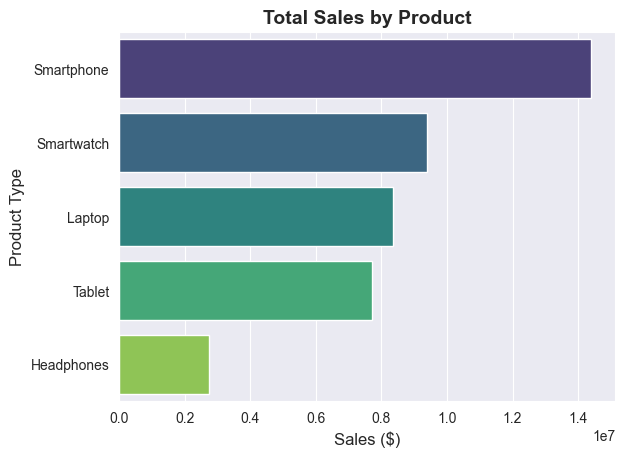

In [ ]:
sns.barplot(data=product_review, x="Sales", y="Product Type", hue="Product Type", palette="viridis", legend=False)
plt.xlabel("Sales ($)", fontsize=12)
plt.ylabel("Product Type", fontsize=12)
plt.title("Total Sales by Product", fontsize=14, fontweight="bold")
plt.show()

**Product Review:**

1.  **Smartphone:** Smartphones clearly generate the most revenue.
2.  **Smartwatch:** Smartwatches come in second place in terms of revenue generation.
3.  **Laptop:** Laptops generate slightly more revenue than tablets.
4.  **Tablet:** Tablets generated less revenue than laptops.
5.  **Headphones:** Headphones generate the least revenue.



### **3. How do cancellations impact revenue?**

In [ ]:
sales_analysis = df.groupby(['Month', 'Order Status'])['Sales'].sum().reset_index()

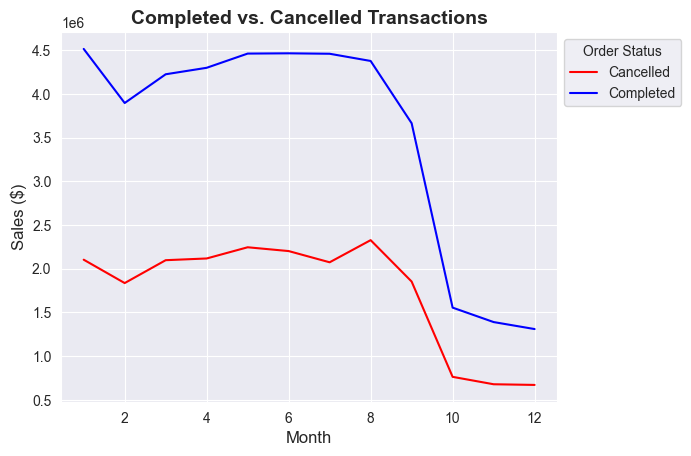

In [ ]:
sns.lineplot(data=sales_analysis, x="Month", y="Sales", hue="Order Status", palette={"Cancelled": "red", "Completed": "blue"})
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.title("Completed vs. Cancelled Transactions", fontsize=14, fontweight="bold")
plt.legend(title="Order Status", loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [262]:
sales = df.groupby(['Month', 'Order Status'])['Sales'].sum().unstack(fill_value=0)
sales.columns = ['Cancelled', 'Completed']

sales['Potential Sales'] = sales['Completed'] + sales['Cancelled']

sales['Revenue'] = (sales['Completed'] / (sales['Potential Sales'])) * 100
sales['Revenue'] = sales['Revenue'].apply(lambda x: f"{x:.2f}%")
sales['Deficit'] = (sales['Cancelled'] / (sales['Potential Sales'])) * 100
sales['Deficit'] = sales['Deficit'].apply(lambda x: f"{x:.2f}%")
sales = sales.reset_index()
sales

,Month,Cancelled,Completed,Potential Sales,Revenue,Deficit
0,1,2103894.66,4516277.81,6620172.47,68.22%,31.78%
1,2,1836445.90,3897250.16,5733696.06,67.97%,32.03%
2,3,2098241.19,4226126.65,6324367.84,66.82%,33.18%
3,4,2117929.93,4300323.69,6418253.62,67.00%,33.00%
4,5,2246127.73,4462915.20,6709042.93,66.52%,33.48%
5,6,2202638.88,4465994.71,6668633.59,66.97%,33.03%
6,7,2074183.04,4460946.48,6535129.52,68.26%,31.74%
7,8,2327685.51,4378433.10,6706118.61,65.29%,34.71%
8,9,1853770.37,3665882.54,5519652.91,66.42%,33.58%
9,10,763140.49,1555325.86,2318466.35,67.08%,32.92%


**Key Insights from the Table**

**1. Revenue Loss Due to Cancellations**

- The Potential Sales column represents the ideal revenue if no orders were canceled.
- The Completed Sales column shows the actual revenue collected after cancellations.
- The difference between these two columns represents the monetary loss due to cancellations.

**2. Deficit Percentage Shows the Lost Opportunity**

- The Deficit column shows what portion of the total potential revenue was lost due to cancellations.
- It ranges from ~31.74% to 34.71%, meaning nearly one-third of potential revenue is lost every month.

**3. Months with the Highest Cancellation Impact**

- August (Month 8) had the highest deficit at 34.71%, meaning almost 35% of the potential revenue was lost.
- December (Month 12) had a 33.86% deficit, making it another high-loss month.

**4. Months with Lower Cancellation Impact**

- July (Month 7) had the lowest deficit at 31.74%, meaning fewer cancellations compared to other months.


------------

## **Cancellations:**

### **1. What percentage of total orders are canceled?**


In [ ]:
cancelled_orders = sales[['Month', 'Deficit']].rename(columns={'Deficit': 'Cancelled Orders %'})
cancelled_orders

,Month,Cancelled Orders %
0,1,31.78%
1,2,32.03%
2,3,33.18%
3,4,33.00%
4,5,33.48%
5,6,33.03%
6,7,31.74%
7,8,34.71%
8,9,33.58%
9,10,32.92%


### **2. Are certain product types more likely to be canceled?**

**Cancelaltion Probability x Month x Product**

In [332]:
df = df.groupby(['Month', 'Product Type', 'Order Status'])['Sales'].sum().unstack(fill_value=0)
df.columns = ['Cancelled', 'Completed']
df['Potential Sales'] = df['Cancelled'] + df['Completed']
df['Cancelled Orders %'] = (df['Cancelled'] / df['Potential Sales']) * 100
df['Cancelled Orders %'] = df['Cancelled Orders %'].apply(lambda x: f"{x:.2f}%")
df = df.sort_values(by=["Month","Cancelled Orders %"], ascending=True)
df = df.reset_index()
df.head()

,Month,Product Type,Cancelled,Completed,Potential Sales,Cancelled Orders %
0,1,Laptop,370684.28,942944.64,1313628.92,28.22%
1,1,Headphones,161808.64,365875.34,527683.98,30.66%
2,1,Smartwatch,395467.00,837457.57,1232924.57,32.08%
3,1,Tablet,406064.66,847438.64,1253503.30,32.39%
4,1,Smartphone,769870.08,1522561.62,2292431.70,33.58%


**Overall Cancellation Probability**

In [ ]:
# Group by Product Type and calculate total and cancelled orders
product_cancel_prob = df.groupby("Product Type")[["Cancelled", "Potential Sales"]].sum()
product_cancel_prob["Cancellation Probability"] = product_cancel_prob["Cancelled"] / product_cancel_prob["Potential Sales"] * 100
product_cancel_prob["Cancellation Probability"] = product_cancel_prob["Cancellation Probability"].apply(lambda x: f"{x:.2f}%")

# Display results sorted by highest cancellation probability
product_cancel_prob = product_cancel_prob.sort_values(by="Cancellation Probability", ascending=False)
product_cancel_prob

,Cancelled,Potential Sales,Cancellation Probability
Product Type,,,
Tablet,3989368.16,11712000.41,34.06%
Smartphone,7108918.85,21516754.69,33.04%
Smartwatch,4637681.83,14036273.06,33.04%
Headphones,1306749.24,4041400.24,32.33%
Laptop,3930334.72,12296239.97,31.96%


**Bayesian Approach**

Our goal is to identify which product types are most likely to be cancelled based on past data. Instead of just looking at the total number of cancellations, we use Bayesian probability to update our belief about a product’s cancellation likelihood when we receive new data.

In [ ]:
# Bayesian
product_prior = df.groupby('Product Type')['Potential Sales'].sum() / df['Potential Sales'].sum()
cancel_likelihood = df.groupby('Product Type')['Cancelled'].sum() / df.groupby('Product Type')['Potential Sales'].sum()
p_cancelled = df['Cancelled'].sum() / df['Potential Sales'].sum()
bayes_posterior = (cancel_likelihood * product_prior) / p_cancelled * 100
bayes_posterior = bayes_posterior.to_frame(name="Cancelled Probability %")
bayes_posterior["Cancelled Probability %"] = bayes_posterior["Cancelled Probability %"].apply(lambda x: f"{x:.2f}%")
bayes_posterior["Cancelled Probability %"] = bayes_posterior["Cancelled Probability %"].str.rstrip('%').astype(float)
bayes_posterior = bayes_posterior.sort_values(by="Cancelled Probability %", ascending=False)
bayes_posterior["Cancelled Probability %"] = bayes_posterior["Cancelled Probability %"].apply(lambda x: f"{x:.2f}%")

bayes_posterior

,Cancelled Probability %
Product Type,
Smartphone,33.90%
Smartwatch,22.11%
Tablet,19.02%
Laptop,18.74%
Headphones,6.23%


**Final Analysis**

- The Bayesian probabilities suggest that if an order gets canceled, it is most likely a smartphone order (33.90%), followed by a smartwatch (22.11%) and a tablet (19.02%).
  - This means that canceled orders are disproportionately made up of smartphone sales, even though tablets had the highest observed cancellation rate in the frequentist approach.

**Why is this different from the frequentist approach?**

- Frequentist (Direct Rate Calculation) → Looks at how often each product type was canceled out of its total sales.
  - Tablets had the highest cancellation rate (34.06%), meaning 34.06% of all tablet orders were canceled.
  
- Bayesian (Conditional Probability) → Looks at how likely a canceled order is to be a specific product type, considering total sales distribution.
  - Smartphones dominate the canceled orders overall (33.90%), meaning if you randomly pick a canceled order, it’s most likely a smartphone.
  
**Key Takeaways:**

- Frequentist: If you buy a tablet, it’s more likely to be canceled than other products.
- Bayesian: If you only look at canceled orders, most of them are smartphones.


### **3. What are the common reasons for cancellations?**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Feature Engineering**

In [ ]:
df = pd.read_csv(file_path)

df['Payment Method'] = df['Payment Method'].replace({'Paypal': 'PayPal'})

df = df.drop(columns=['Unit Price', 'Quantity', 'Customer ID', 'Product Type', 'SKU', 'Purchase Date', 'Add-ons Purchased', 'Add-on Total'], errors='ignore')
categorical_cols = ['Gender', 'Loyalty Member', 'Payment Method', 'Shipping Type', 'Order Status']
df[categorical_cols] = df[categorical_cols].astype(str)


**One-hot-enconding**

In [11]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df.astype(int)
df.head()

,Age,Rating,Total Price,Gender_Male,Gender_nan,Loyalty Member_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Shipping Type_Express,Shipping Type_Overnight,Shipping Type_Same Day,Shipping Type_Standard,Order Status_Completed
0,53,2,5538,1,0,0,0,1,0,0,0,0,0,1,0
1,53,3,741,1,0,0,0,0,0,1,0,1,0,0,1
2,41,3,1855,1,0,0,0,1,0,0,1,0,0,0,1
3,41,2,3164,1,0,1,1,0,0,0,0,1,0,0,1
4,75,5,41,1,0,1,1,0,0,0,1,0,0,0,1


**Zscore Normalization**

In [14]:
numerical_cols = ['Age', 'Rating', 'Total Price']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].head()

,Age,Rating,Total Price
0,0.222078,-0.893945,0.926697
1,0.222078,-0.076773,-0.958261
2,-0.443174,-0.076773,-0.520520
3,-0.443174,-0.893945,-0.006155
4,1.441705,1.557570,-1.233323


In [15]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df.head()


,Age,Rating,Total Price,Gender_Male,Gender_nan,Loyalty Member_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Shipping Type_Express,Shipping Type_Overnight,Shipping Type_Same Day,Shipping Type_Standard,Order Status_Completed
0,0.222078,-0.893945,0.926697,1,0,0,0,1,0,0,0,0,0,1,0
1,0.222078,-0.076773,-0.958261,1,0,0,0,0,0,1,0,1,0,0,1
2,-0.443174,-0.076773,-0.520520,1,0,0,0,1,0,0,1,0,0,0,1
3,-0.443174,-0.893945,-0.006155,1,0,1,1,0,0,0,0,1,0,0,1
4,1.441705,1.557570,-1.233323,1,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
y = 1 - df['Order Status_Completed']
X = df.drop(columns=['Order Status_Completed'])

X.head()

,Age,Rating,Total Price,Gender_Male,Gender_nan,Loyalty Member_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Shipping Type_Express,Shipping Type_Overnight,Shipping Type_Same Day,Shipping Type_Standard
0,0.222078,-0.893945,0.926697,1,0,0,0,1,0,0,0,0,0,1
1,0.222078,-0.076773,-0.958261,1,0,0,0,0,0,1,0,1,0,0
2,-0.443174,-0.076773,-0.520520,1,0,0,0,1,0,0,1,0,0,0
3,-0.443174,-0.893945,-0.006155,1,0,1,1,0,0,0,0,1,0,0
4,1.441705,1.557570,-1.233323,1,0,1,1,0,0,0,1,0,0,0


In [ ]:
import numpy as np

print("Class Distribution in Target Variable:")
print(np.bincount(y))

Class Distribution in Target Variable:
[13432  6568]
